In [5]:
import pandas as pd
import numpy as np

In [15]:
# these are computed by electric_capacity.ipynb
power_counts_23 = pd.read_csv('../data/apr2023/power_counts.csv')
power_counts_23.name = '2023'
power_counts_24 = pd.read_csv('../data/dec2024/power_counts.csv')
power_counts_24.name = '2024'

In [16]:
def show_stats(df, col='max_power'):
    all_vals = np.repeat(df[col].to_list(), df['count'].to_list())
    s = pd.Series(all_vals)
    print(s.describe())

print(show_stats(power_counts_23))
print(show_stats(power_counts_24))

    

count    34567.000000
mean       133.305002
std         56.020356
min         46.000000
25%         86.000000
50%        125.000000
75%        160.000000
max        250.000000
dtype: float64
None
count    100704.000000
mean        131.956576
std          62.021856
min          46.000000
25%          86.000000
50%          92.000000
75%         160.000000
max         300.000000
dtype: float64
None


In [17]:
print(show_stats(power_counts_23, col='capacity'))
print(show_stats(power_counts_24, col='capacity'))


count    34567.000000
mean        62.333494
std          8.551901
min         50.000000
25%         58.000000
50%         59.000000
75%         63.100000
max         90.000000
dtype: float64
None
count    100704.000000
mean         63.157963
std           9.004179
min          50.000000
25%          58.000000
50%          59.000000
75%          64.000000
max          92.000000
dtype: float64
None


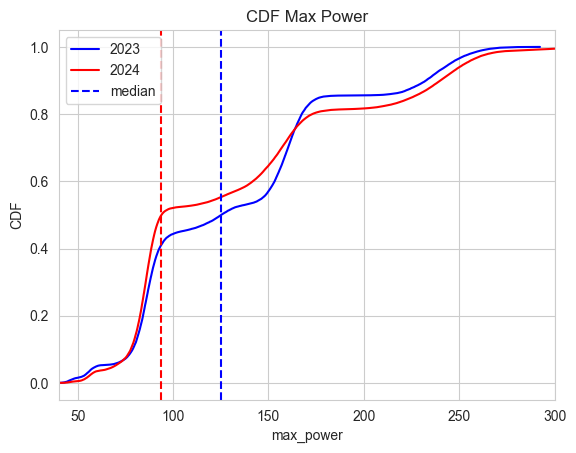

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture

def cdf_plot_from_dfs(df1: pd.DataFrame, df2: pd.DataFrame, x_col: str, title: str = None, jitter: float = 0.01, cap: float = 300.0):
    """
    Generate a smoothed CDF plot from two DataFrames using jittered data.

    Parameters:
    - df1 (pd.DataFrame): The first DataFrame containing values and their counts.
    - df2 (pd.DataFrame): The second DataFrame containing values and their counts.
    - x_col (str): The name of the column containing the values.
    - title (str, optional): The title for the plot. Defaults to None.
    - jitter (float, optional): The amount of jitter to add to the values. Defaults to 0.01.
    - cap (float, optional): The maximum value to cap the CDF plot. Defaults to 300.0.

    Returns:
    - None
    """
    # Extract the values and their counts for both dataframes
    values1 = df1[x_col].to_list()
    counts1 = df1['count'].to_list()
    values2 = df2[x_col].to_list()
    counts2 = df2['count'].to_list()

    # Create numpy arrays with repeated values based on their counts
    all_values1 = np.repeat(values1, counts1)
    all_values2 = np.repeat(values2, counts2)

    # Add jitter to the values
    all_values1 *= (1+np.random.normal(scale=jitter, size=len(all_values1)))
    all_values2 *= (1+np.random.normal(scale=jitter, size=len(all_values2)))

    # Sort the values for CDF calculation
    all_values1.sort()
    all_values2.sort()

    # Calculate the CDF for both sets of values
    cdf1 = np.linspace(0, 1, len(all_values1))
    cdf2 = np.linspace(0, 1, len(all_values2))

    # Create the figure and plot the smoothed CDFs
    fig, ax = plt.subplots()
    ax.plot(all_values1, cdf1, label=df1.name, color='blue')
    ax.plot(all_values2, cdf2, label=df2.name, color='red')

    # Draw marker lines for the medians
    ax.axvline(np.median(all_values1), color='blue', linestyle='--', label='median')
    ax.axvline(np.median(all_values2), color='red', linestyle='--')

    # Cap the x-axis if specified
    if cap:
        ax.set_xlim(left=0, right=cap)

    # Add a title if provided
    if title:
        ax.set_title(title)

    # Set labels, legend, and show the plot
    ax.set_xlabel(x_col)
    ax.set(ylabel='CDF')
    plt.xlim(40, cap)
    ax.legend()
    plt.show()

# Example usage
cdf_plot_from_dfs(power_counts_23, power_counts_24, 'max_power', 'CDF Max Power', jitter=0.05, cap=300)